In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data import dataset

In [2]:
data = dataset()
(x, y) = data('test')

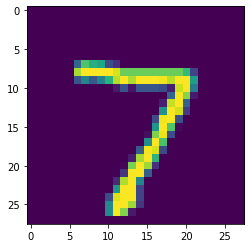

In [12]:
plt.imshow(x[0])

In [113]:
from PIL import ImageOps, ImageFilter
from PIL import Image, ImageDraw, ImageFont


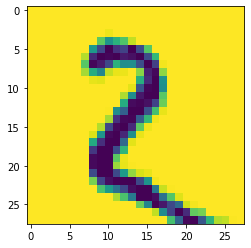

In [130]:
class Deformer:
    def transform(self, x, y):
        y = y + 5*np.sin(x/6) - 5
        return x, y

    def transform_rectangle(self, x0, y0, x1, y1):
        return (*self.transform(x0, y0),
                *self.transform(x0, y1),
                *self.transform(x1, y1),
                *self.transform(x1, y0),
                )
    
    def getmesh(self, img):
        self.w, self.h = img.size
        gridspace = 8
        target_grid = []        
        for x in range(0, self.w, gridspace):
            for y in range(0, self.h, gridspace):
                target_grid.append((x, y, x + gridspace, y + gridspace))
        
        source_grid = [self.transform_rectangle(*rect) for rect in target_grid]
        return [t for t in zip(target_grid, source_grid)]
    


im = Image.fromarray(x[1,:,:,0])

#im = ImageOps.flip(im)
#im = ImageOps.mirror(im)
#im = im.filter(ImageFilter.BoxBlur(5))

im = ImageOps.deform(im, Deformer())

plt.imshow((1 - np.asarray(im) / 255) * 255)

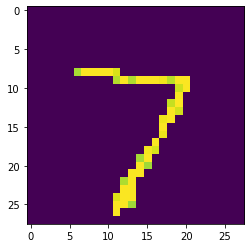

In [15]:
# augmentations: thresholding with factor 0.5, 0.75, 0.85, as well as binarization with same factors
#  add digits from built in fonts (generate): different fonts, different font sizes, different max value
#  add letters and symbols from systems fonts as non-digits: 339 fonts times 100 symbols = 33900 samples 
#  rotations, shifts, distortions
#  change dynamic range (make the image more pale)
#  invert image
#  flip image
#  solarize (invert pixels above treshold)
#  blur

plt.imshow((x[0] > 0.85) * x[0] )

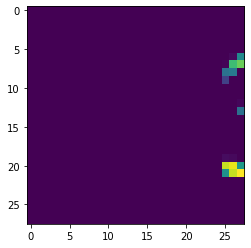

In [99]:

fonts = ["arial.ttf", "times.ttf", "verdana.ttf", "corbel.ttf", "impact.ttf"]

def generate_digit(digit, font="arial.ttf"):
    im = Image.new("L", (28,28))
    fnt = ImageFont.truetype(font, 24)
    dc = ImageDraw.Draw(im)
    dc.text((24,0), str(digit), font=fnt, fill=128)
    return np.asarray(im)


plt.imshow(generate_digit(3, "times.ttf"))

In [68]:
from matplotlib import font_manager

In [69]:
system_fonts = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [71]:
print(len(system_fonts))

339
